In [4]:
# Basic imports
import jax.numpy as np
import jax.random as jr
import jax.scipy as jsp

# Optimisation imports
import zodiax as zdx
import optax

# dLux imports
import dLux as dl
import dLux.utils as dlu

# Visualisation imports
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt

plt.rcParams['image.cmap'] = 'viridis'

plt.rcParams["image.origin"] = 'lower'


In [5]:
# Define our wavefront properties
wf_npix = 512  # Number of pixels in the wavefront
diameter = 1.0  # Diameter of the wavefront, meters

# Construct a simple circular aperture
coords = dlu.pixel_coords(wf_npix, diameter)
aperture = dlu.circle(coords, 0.5 * diameter)

# Define our detector properties
psf_npix = 64  # Number of pixels in the PSF
psf_pixel_scale = 50e-3  # 50 mili-arcseconds
oversample = 3  # Oversampling factor for the PSF

# Define the optical layers
# Note here we can pass in a tuple of (key, layer) paris to be able to 
# access the layer from the optics object with the key!
layers = [
    (
        "aperture",
        dl.layers.TransmissiveLayer(transmission=aperture, normalise=True),
    )
]

# Construct the optics object
optics = dl.AngularOpticalSystem(
    wf_npix, diameter, layers, psf_npix, psf_pixel_scale, oversample
)

# Models some wavelengths through the system
wavels = 1e-6 * np.linspace(1, 1.2, 10)
psf = optics.propagate(wavels)

# Get out aperture transmission for plotting
# Note we can use the 'aperture' key we supplied in the layers to access 
# that layer directly from the optics object!
transmission = optics.aperture.transmission

# Let examine the optics object! The dLux framework has in-built 
# pretty-printing, so we can just print the object to see what it contains.
print(optics)

AngularOpticalSystem(
  wf_npixels=512,
  diameter=1.0,
  layers={
    'aperture': TransmissiveLayer(transmission=f32[512,512], normalise=True)
  },
  psf_npixels=64,
  oversample=3,
  psf_pixel_scale=0.05
)


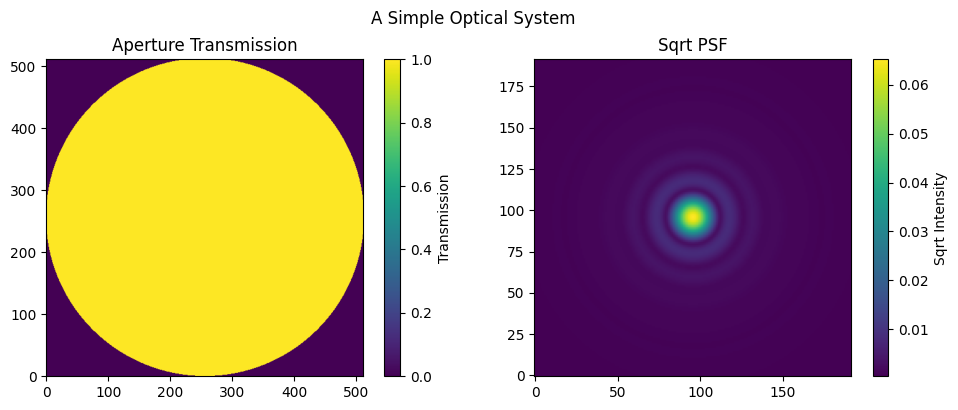

In [6]:
# Plot the results
plt.figure(figsize=(10, 4))
plt.suptitle("A Simple Optical System")
plt.subplot(1, 2, 1)
plt.title("Aperture Transmission")
plt.imshow(transmission)
plt.colorbar(label="Transmission")

plt.subplot(1, 2, 2)
plt.title("Sqrt PSF")
plt.imshow(psf**0.5)
plt.colorbar(label="Sqrt Intensity")
plt.tight_layout()
plt.show()